In [137]:
import pandas as pd

ad_clicks = pd.read_csv("ad_clicks.csv")
ad_clicks.head()

,user_id,utm_source,day,ad_click_timestamp,experimental_group
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,7:18,A
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B


Your manager wants to know which ad platform is getting you the most views.

How many views (i.e., rows of the table) came from each utm_source?

In [138]:
utm_source_count = ad_clicks.groupby("utm_source").user_id.count().sort_values(ascending=False).reset_index()
utm_source_count

,utm_source,user_id
0,google,680
1,facebook,504
2,email,255
3,twitter,215


We want to know the percent of people who clicked on ads from each utm_source.

In [139]:
#create a new column (is_clicked) true if clicked false otherwise
ad_clicks["is_clicked"] = ~ad_clicks.ad_click_timestamp.isnull()
ad_clicks.head()

,user_id,utm_source,day,ad_click_timestamp,experimental_group,is_clicked
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,7:18,A,True
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B,False
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A,False
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B,False
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B,False


In [140]:
# groupby "utm_source" and "is_clicked" to determine how many users clicked or not for each utm_source.
clicked_source = ad_clicks.groupby(["utm_source","is_clicked"]).user_id.count().reset_index()
clicked_source

,utm_source,is_clicked,user_id
0,email,False,175
1,email,True,80
2,facebook,False,324
3,facebook,True,180
4,google,False,441
5,google,True,239
6,twitter,False,149
7,twitter,True,66


In [141]:
#create a pivot table for an appealing visualization and calculate the "percent_clicked" of each utm_source.
clicked_source_pivot = clicked_source.pivot(columns="is_clicked",index="utm_source",values="user_id").reset_index()
clicked_source_pivot["percent_clicked"] = round(clicked_source_pivot[True] / (clicked_source_pivot[True] + clicked_source_pivot[False]),3) * 100
clicked_source_pivot

is_clicked,utm_source,False,True,percent_clicked
0,email,175,80,31.4
1,facebook,324,180,35.7
2,google,441,239,35.1
3,twitter,149,66,30.7


Were approximately the same number of people shown both ads? Yes

In [142]:
#determine the amount of people that where shown Ad A and B
experimental_group_count = ad_clicks.groupby("experimental_group").user_id.count().reset_index()
experimental_group_count

,experimental_group,user_id
0,A,827
1,B,827


Check to see if a greater percentage of users clicked on Ad A or Ad B.

In [143]:
clicked_on_A_or_B = ad_clicks.groupby(["experimental_group","is_clicked"]).user_id.count().reset_index()
clicked_on_A_or_B_pivot = clicked_on_A_or_B.pivot(columns="is_clicked", index="experimental_group", values="user_id").reset_index()
clicked_on_A_or_B_pivot["percent_clicked"] = round(clicked_on_A_or_B_pivot[True] / (clicked_on_A_or_B_pivot[True] + clicked_on_A_or_B_pivot[False]),3) * 100
clicked_on_A_or_B_pivot

is_clicked,experimental_group,False,True,percent_clicked
0,A,517,310,37.5
1,B,572,255,30.8


The Product Manager for the A/B test thinks that the clicks might have changed by day of the week

Compare the results for A and B. What happened over the course of the week?

Do you recommend that your company use Ad A or Ad B?

In [144]:
a_clicks = ad_clicks[ad_clicks["experimental_group"] == "A"]
a_clicks.head()

,user_id,utm_source,day,ad_click_timestamp,experimental_group,is_clicked
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,7:18,A,True
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A,False
5,013b0072-7b72-40e7-b698-98b4d0c9967f,facebook,1 - Monday,NaN,A,False
6,0153d85b-7660-4c39-92eb-1e1acd023280,google,4 - Thursday,NaN,A,False
7,01555297-d6e6-49ae-aeba-1b196fdbb09f,google,3 - Wednesday,NaN,A,False


In [145]:
b_clicks = ad_clicks[ad_clicks["experimental_group"] == "B"]
b_clicks.head()

,user_id,utm_source,day,ad_click_timestamp,experimental_group,is_clicked
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B,False
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B,False
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B,False
9,01a210c3-fde0-4e6f-8efd-4f0e38730ae6,email,2 - Tuesday,15:21,B,True
10,01adb2e7-f711-4ae4-a7c6-29f48457eea1,google,3 - Wednesday,NaN,B,False


In [146]:
a_clicks_by_day = a_clicks.groupby(["is_clicked", "day"]).user_id.count().reset_index()
a_clicks_by_day_pivot = a_clicks_by_day.pivot(columns="is_clicked",index="day",values="user_id").reset_index()
a_clicks_by_day_pivot["percent_clicked"] = round(a_clicks_by_day_pivot[True] / (a_clicks_by_day_pivot[True] + a_clicks_by_day_pivot[False]),3) * 100
a_clicks_by_day_pivot

is_clicked,day,False,True,percent_clicked
0,1 - Monday,70,43,38.1
1,2 - Tuesday,76,43,36.1
2,3 - Wednesday,86,38,30.6
3,4 - Thursday,69,47,40.5
4,5 - Friday,77,51,39.8
5,6 - Saturday,73,45,38.1
6,7 - Sunday,66,43,39.4


In [147]:
b_clicks_by_day = b_clicks.groupby(["is_clicked", "day"]).user_id.count().reset_index()
b_clicks_by_day_pivot = b_clicks_by_day.pivot(columns="is_clicked",index="day",values="user_id").reset_index()
b_clicks_by_day_pivot["percent_clicked"] = round(b_clicks_by_day_pivot[True] / (b_clicks_by_day_pivot[True] + b_clicks_by_day_pivot[False]),3) * 100
b_clicks_by_day_pivot

is_clicked,day,False,True,percent_clicked
0,1 - Monday,81,32,28.3
1,2 - Tuesday,74,45,37.8
2,3 - Wednesday,89,35,28.2
3,4 - Thursday,87,29,25.0
4,5 - Friday,90,38,29.7
5,6 - Saturday,76,42,35.6
6,7 - Sunday,75,34,31.2


In [148]:
a_clicks_by_day_pivot["percent_clicked"]

0    38.1
1    36.1
2    30.6
3    40.5
4    39.8
5    38.1
6    39.4
Name: percent_clicked, dtype: float64

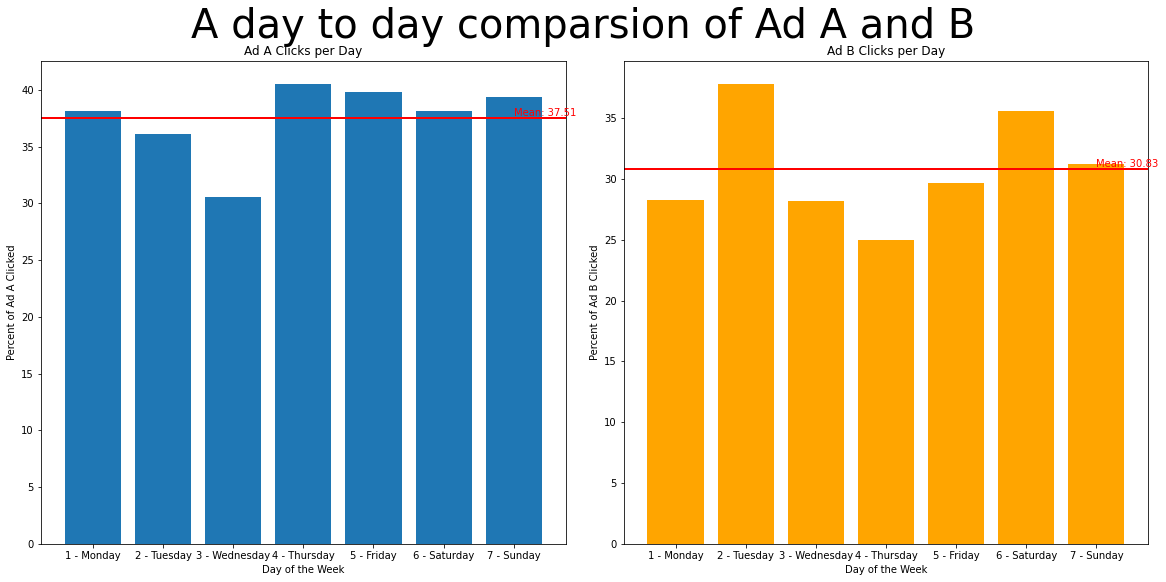

In [150]:
import matplotlib.pyplot as plt

a_mean = a_clicks_by_day_pivot["percent_clicked"].mean()
b_mean = b_clicks_by_day_pivot["percent_clicked"].mean()

plt.figure(figsize=(16,8))
plt.suptitle("A day to day comparsion of Ad A and B", fontsize=40)
plt.subplot(1,2,1)
plt.tight_layout(w_pad=5)
plt.bar(a_clicks_by_day_pivot["day"],a_clicks_by_day_pivot["percent_clicked"])
plt.title("Ad A Clicks per Day")
plt.xlabel("Day of the Week")
plt.ylabel("Percent of Ad A Clicked")
plt.axhline(y=a_mean, color='r', linestyle='-', linewidth=2)
plt.text(x=len(a_clicks_by_day_pivot["day"])-1, y=a_mean, s=f'Mean: {a_mean:.2f}', color='r', va='bottom')


plt.subplot(1,2,2)
plt.bar(b_clicks_by_day_pivot["day"], b_clicks_by_day_pivot["percent_clicked"], color="orange")
plt.title("Ad B Clicks per Day")
plt.xlabel("Day of the Week")
plt.ylabel("Percent of Ad B Clicked")
plt.axhline(y=b_mean, color='r', linestyle='-', linewidth=2)
plt.text(x=len(b_clicks_by_day_pivot["day"])-1, y=b_mean, s=f'Mean: {b_mean:.2f}', color='r', va='bottom')

plt.savefig("AB Test Graph")

<Figure size 432x288 with 0 Axes>